# DATA COLLECTION 

<br> In this file all the data needed for our Data Viz project are retrieved from Yahoo Finance. 
<br> Because of server restrictions, only daily frequency is available. 

In [114]:
import subprocess
import sys

import warnings
warnings.filterwarnings("ignore")

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade", "--no-cache-dir"])
# install_package("yfinance")
# install_package("yahoo_fin")

import time
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
import yfinance as yf

In [174]:
'''
DEFINING THE MAIN ASSETS TO BE ANALYZED 
'''

equity_categ = {'Technology' : ['AAPL', 'META', 'VISA'],
        'Consumer Discretionary' : ['LVMH', 'NFLX', 'NIKE'],
        'Financials' : ['JPM', 'BAC', 'C'],
        'Trendy' : ['NVDA', 'LLY', 'TSLA'],
        'Indices' : ['^SPX', '^DJI', '^RUS']
        
    }


ticker_dict = {   
    'Equity' : ['AAPL', 'META', 'V',   #Technology
                'MC.PA', 'NFLX', 'NKE',   #Consumer Discretionary
                'JPM', 'BAC', 'C',        #Financials
                'NVDA', 'LLY', 'TSLA',      #Trendy
                '^SPX', '^DJI', '^RUT'],   #Equity Indices
    'Commodities' : ['IAU', 'CPER', 'GSG', 'CL=F'], 
    'Credit' : ['TLT', 'JNK', 'LQD'],
    'Crypto' : ['BTC-USD', 'ETH-USD', 'XRP-USD']

    #if need info about what a ticker represents, please Google/ChatGPT it. 
}


count = 0 
for ticker_categ in ticker_dict.keys(): 
    for ticker in ticker_dict[ticker_categ]:
        count += 1
print(f'There are {count} tickers.')

'''
DEFINING KEY VARIABLES
'''
start_date = '2015-01-01'
# end_date = datetime.now().strftime("%Y-%m-%d")
end_date = '2024-02-15' #for simplification to ensure datasets are consistent in size


There are 25 tickers.


In [175]:
''' UTIL FUNCTIONS '''

# def get_logreturn(df, ticker_name): 
    
#     date_column = df.columns[0]
#     price_column = df.columns[1]
    
#     df = df.sort_values(by = date_column)
    
#     title = ticker_name + 'log_return'
#     df[title] = np.log(df[price_column] / df[price_column].shift(1))
    
#     return df


def get_logreturn(df_price_col):
    return np.log(df_price_col / df_price_col.shift(1)) * 100 

def minmax_scaler(df, spread = 1):
    min_df = df.min()
    max_df = df.max() 
    
    df = df.apply(lambda x : ((x-min_df) / (max_df - min_df)) / spread)
    
    return df 

In [176]:
'''DOWNLOADING THE DATASETS'''

'''
Define a dictionary with the following structure: 

main_dic = {
    Ticker : Dataframe
}
'''

main_dict = {}

count_2 = 0
for ticker_categ in ticker_dict.keys(): 
    print(f'Category: {ticker_categ}')
    time.sleep(1)
    for ticker in ticker_dict[ticker_categ]:
        temp_df = pd.DataFrame()
        temp_df = yf.download(ticker, start=start_date, end=end_date)
        print(f'Dataset for ticker {ticker} has been successfully downloaded. \nLength of dataset is: {len(temp_df)}')
        time.sleep(1)
        
        #FEATURE ENGINEERING
        date_column = temp_df.index
        temp_df = temp_df.sort_index()
        
        #Daily price normalized to the total volume of the dataset
        temp_df['price_volume'] = temp_df['Close'] * temp_df['Volume']
        temp_df['Norm_PV'] = (temp_df['price_volume'] / temp_df['Volume'].sum()) #Norm_PV = Normalized Price Volume

        #Renaming (for merging purposes):
        title_1 = ticker + ': Close'
        title_2 = ticker + ': Norm_PV'
        title_3 = ticker + ': Log-Returns'
        
        #Log-returns
        temp_df[title_3] = get_logreturn(temp_df['Close']) #Results are in %
        temp_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'price_volume'], axis = 1, inplace = True)
        
        temp_df.rename(columns={'Close': title_1,
                                'Norm_PV': title_2,
                               }, inplace=True)

        main_dict[ticker] = temp_df
        count_2 += 1
    print()

assert count == count_2


Category: Equity


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker AAPL has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker META has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker V has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker MC.PA has been successfully downloaded. 
Length of dataset is: 2337


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker NFLX has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker NKE has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker JPM has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker BAC has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker C has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker NVDA has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker LLY has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker TSLA has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker ^SPX has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker ^DJI has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker ^RUT has been successfully downloaded. 
Length of dataset is: 2295

Category: Commodities


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker IAU has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker CPER has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker GSG has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker CL=F has been successfully downloaded. 
Length of dataset is: 2294

Category: Credit


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker TLT has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker JNK has been successfully downloaded. 
Length of dataset is: 2295


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker LQD has been successfully downloaded. 
Length of dataset is: 2295

Category: Crypto


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker BTC-USD has been successfully downloaded. 
Length of dataset is: 3332


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker ETH-USD has been successfully downloaded. 
Length of dataset is: 2289


[*********************100%%**********************]  1 of 1 completed


Dataset for ticker XRP-USD has been successfully downloaded. 
Length of dataset is: 2289



In [196]:
print(type(main_dict['AAPL']))

main_dict['AAPL'].columns
main_dict['AAPL'].index

# main_dict['AAPL']['AAPL: Norm_PV']
# main_dict['AAPL']['AAPL: Log-Returns']    
# main_dict['LQD']['LQD: Log-Returns']

for k, v in main_dict.items(): 
    try : 
        
        print(k + '\t' + main_dict[k].columns[1] + '\t\t' , main_dict[k].loc['2018-01-09', main_dict[k].columns[1]])
    except KeyError as err: 
        print(f'Error for {v, k}')

<class 'pandas.core.frame.DataFrame'>
AAPL	AAPL: Norm_PV		 0.013345202806165895
META	META: Norm_PV		 0.04271501618456581
V	V: Norm_PV		 0.04151740909267992
MC.PA	MC.PA: Norm_PV		 0.07947989902187935
NFLX	NFLX: Norm_PV		 0.05913265500632285
NKE	NKE: Norm_PV		 0.031457270324191496
JPM	JPM: Norm_PV		 0.043768552920153414
BAC	BAC: Norm_PV		 0.013694218191555866
C	C: Norm_PV		 0.02413873636072971
NVDA	NVDA: Norm_PV		 0.025149829391251245
LLY	LLY: Norm_PV		 0.021582130178552233
TSLA	TSLA: Norm_PV		 0.009101453880615675
^SPX	^SPX: Norm_PV		 1.0350164575792669
^DJI	^DJI: Norm_PV		 12.682382444286194
^RUT	^RUT: Norm_PV		 0.5875569280080132
IAU	IAU: Norm_PV		 0.00799558103028392
CPER	CPER: Norm_PV		 0.00019899556213073716
GSG	GSG: Norm_PV		 0.0030573151835111053
CL=F	CL=F: Norm_PV		 0.048577432705747194
TLT	TLT: Norm_PV		 0.06189919290563136
JNK	JNK: Norm_PV		 0.022391789019263676
LQD	LQD: Norm_PV		 0.03548890211664282
BTC-USD	BTC-USD: Norm_PV		 4.243089760622022
ETH-USD	ETH-USD: Norm_PV		 0.376

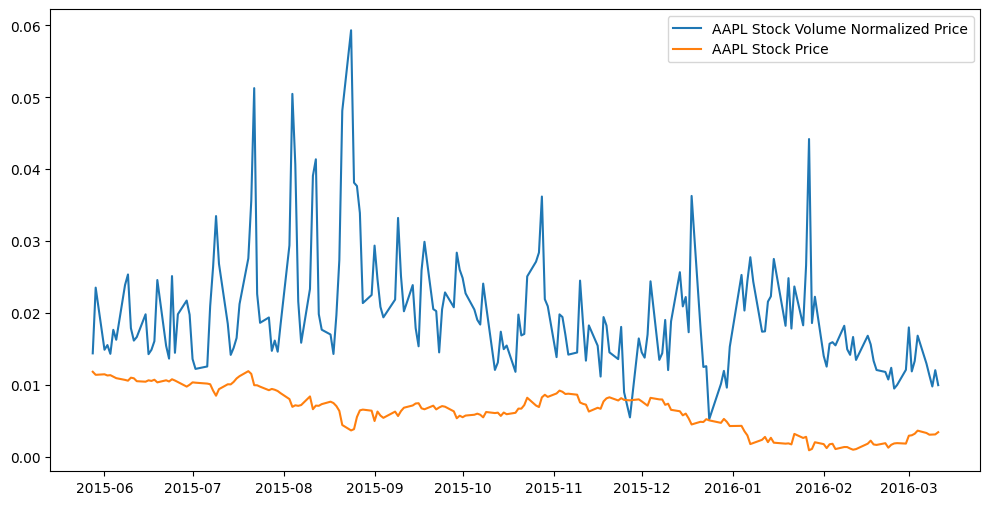

In [178]:
plt.figure(figsize=(12, 6))
plt.plot(main_dict['AAPL']['AAPL: Norm_PV'][100:300], label= 'AAPL Stock Volume Normalized Price')
plt.plot(minmax_scaler(main_dict['AAPL']['AAPL: Close'], spread = 5)[100:300], label= 'AAPL Stock Price')
plt.legend()
plt.show()


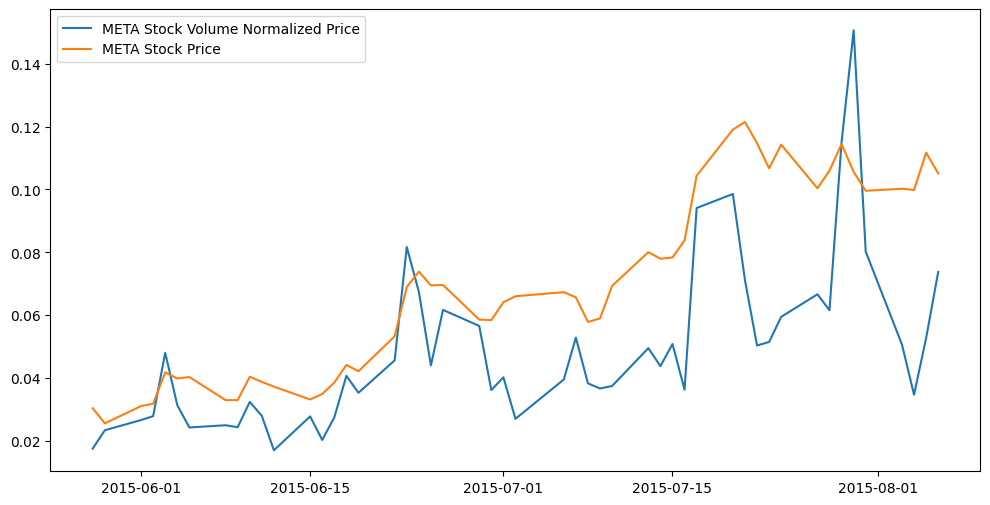

In [179]:
plt.figure(figsize=(12, 6))
plt.plot(main_dict['META']['META: Norm_PV'][100:150], label= 'META Stock Volume Normalized Price')
plt.plot(minmax_scaler(main_dict['META']['META: Close'], spread = 0.5)[100:150], label= 'META Stock Price')
plt.legend()
plt.show()

In [180]:
'''
Now, a key part is to merge all our little dataframes in a way that we have the same number of observations.

'''

df_list = []

for k, v in main_dict.items():
    df_list.append(v)
    
assert count == (len(df_list))

merged_df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='inner'), df_list)

merged_df.head(10)

merged_df.describe()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1561 entries, 2017-11-09 to 2024-02-14
Data columns (total 75 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AAPL: Close           1561 non-null   float64
 1   AAPL: Norm_PV         1561 non-null   float64
 2   AAPL: Log-Returns     1561 non-null   float64
 3   META: Close           1561 non-null   float64
 4   META: Norm_PV         1561 non-null   float64
 5   META: Log-Returns     1561 non-null   float64
 6   V: Close              1561 non-null   float64
 7   V: Norm_PV            1561 non-null   float64
 8   V: Log-Returns        1561 non-null   float64
 9   MC.PA: Close          1561 non-null   float64
 10  MC.PA: Norm_PV        1561 non-null   float64
 11  MC.PA: Log-Returns    1561 non-null   float64
 12  NFLX: Close           1561 non-null   float64
 13  NFLX: Norm_PV         1561 non-null   float64
 14  NFLX: Log-Returns     1561 non-null   float64
 15  NKE

In [181]:
merged_df.to_excel('merged_df.xlsx', index=False)
merged_df.to_csv('merged_df.csv', index = False)
